## Dataset: Diabetes
## Agenda:
### Diabetes Prediction Classifier we have to develop an application to predict using 
### the Decision Tree Clasifier. Use Bagging to improve the Accuracy Score.

In [1]:
# Import Library
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the Data set
data=pd.read_csv("D:/ML Data Set/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

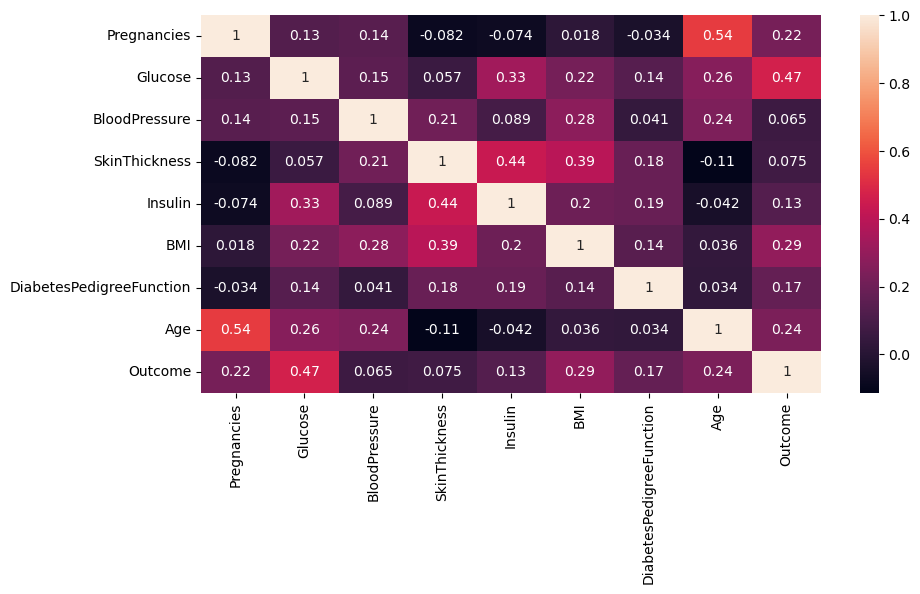

In [3]:
# Make the HeatMap
import seaborn as sns
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(data.corr(),annot=True)

In [4]:
X = data.iloc[:, :8] # It takes 7 columns : sepal length and sepal width
# we only take the first two features.
y = data.iloc[:,-1] # It takes only 1 column : Species [setosa = 0, versicolor = 1, ver
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
C = 1.0 # SVM regularization parameter
svc1 = svm.SVC(kernel='linear', C=1, gamma=0.1, random_state=2).fit(X, y)
svc2 = svm.SVC(kernel='rbf', gamma=0.5, C=1).fit(X, y)

In [6]:
svc3=svm.SVC(kernel='poly',degree=5,C=1).fit(X,y)

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.metrics import confusion_matrix # accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [9]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=2)
# Performing training
clf_entropy.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [10]:
ypred=clf_entropy.predict(xtest)
print("Predicted Values")
print(ypred)

Predicted Values
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0]


In [11]:
print("Confusion Matrics:\n",confusion_matrix(ytest,ypred))
print("Accuracy:",accuracy_score(ytest,ypred)*100)
print("Report:\n",classification_report(ytest,ypred))

Confusion Matrics:
 [[124  22]
 [ 31  54]]
Accuracy: 77.05627705627705
Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



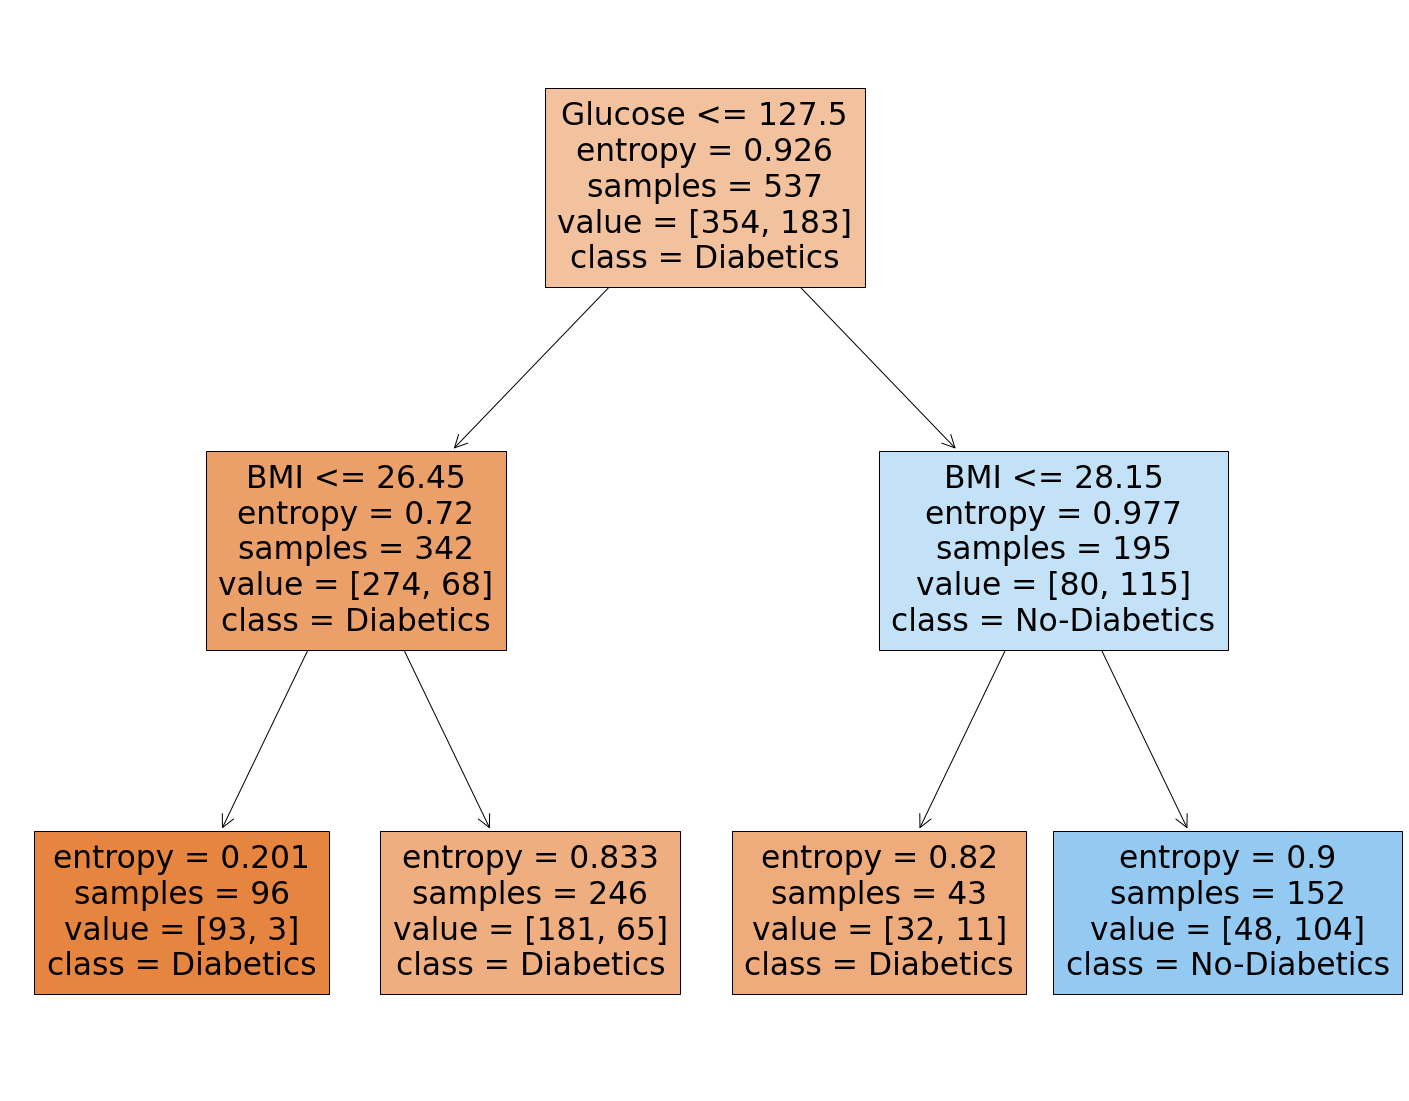

In [12]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(clf_entropy,feature_names=X.columns,class_names=["Diabetics","No-Diabetics" ],filled=True)

In [14]:
# Prediction on random data using clf_entropy
# We put random 2 feature values and make prediction
xrandom=[[6.8,1.8,6.3,78,7.2,89,1,2]]
ypred1=clf_entropy.predict(xrandom)
print(ypred1)

[0]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
# Fittingthe mode
tree=tree.fit(xtrain,ytrain)
bag=BaggingClassifier(base_estimator=tree,n_estimators=500,random_state=1)
bag=bag.fit(xtrain,ytrain)
# Prediciting
y_train_pred=bag.predict(xtrain)
y_test_pred=bag.predict(xtest)
bag_test=round(accuracy_score(ytest,y_test_pred),2)*100
print(bag_test,"%")

78.0 %
